## Feature Engineering
Documentation: https://support.google.com/analytics/answer/3437719?hl=en

Note: the field 'unique_visit_id' should be unique but is not (around 1800 repeated unique_visit_id's):

trainCSV['unique_visit_id'] = trainCSV.fullVisitorId +'_'+ trainCSV.visitId.apply(str)

In [1]:
import matplotlib
import datetime as dt
import numpy as np
from data_wrangling import *
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 150)

In [2]:
%%time
trainCSV = pd.read_csv('train_v2_flat.csv', sep=',', encoding='utf-8', low_memory=False).drop(columns=['trafficSource_campaignCode'])
testCSV = pd.read_csv('test_v2_flat.csv', sep=',', encoding='utf-8', low_memory=False)

trainCSV = fill_empty_values(trainCSV)
testCSV = fill_empty_values(testCSV)

CPU times: user 59.1 s, sys: 4.37 s, total: 1min 3s
Wall time: 1min 3s


In [5]:
start_validation_visits = trainCSV.date.max() - timedelta(days=276)
end_validation_visits = trainCSV.date.max()

start_train_visits = start_validation_visits - timedelta(days=276)
end_train_visits = start_validation_visits

start_encoding_visits = trainCSV.date.min()
end_encoding_visits = start_train_visits

encoding_visits = get_visits_from_time_period(trainCSV, start_encoding_visits, end_encoding_visits)
train_visits = get_visits_from_time_period(trainCSV, start_train_visits, end_train_visits)
validation_visits = get_visits_from_time_period(trainCSV, start_validation_visits, end_validation_visits)
test_visits =testCSV

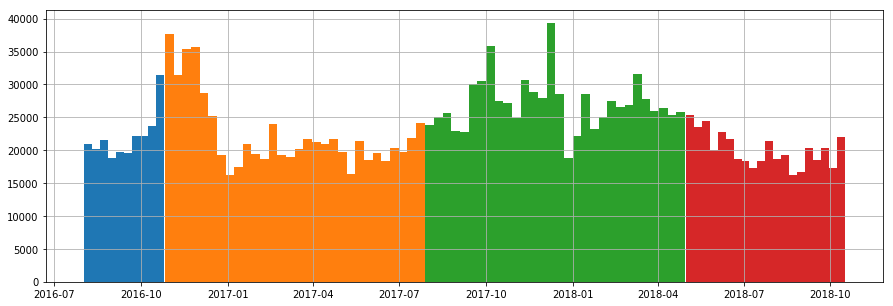

In [12]:
encoding_visits.date.hist(bins=10, figsize=(15, 5))
train_visits.date.hist(bins=30, figsize=(15, 5))
validation_visits.date.hist(bins=30, figsize=(15, 5))
test_visits.date.hist(bins=20, figsize=(15, 5))

In [7]:
%%time
train = get_training_data_from_visits(train_visits)
validation = get_training_data_from_visits(validation_visits)
test = create_features(test_visits).reset_index()

2016-10-26 00:00:00
len(all_training_periods) 1
2017-07-29 00:00:00
len(all_training_periods) 1
CPU times: user 44.8 s, sys: 3.49 s, total: 48.3 s
Wall time: 48.6 s


In [8]:
%%time
encoder = CategoricalEncoder().fit(encoding_visits)
train_e = encoder.transform(train)
validation_e = encoder.transform(validation)
test_e = encoder.transform(test)

CPU times: user 4min 8s, sys: 5.09 s, total: 4min 13s
Wall time: 5min 50s


In [10]:
%%time
train_e.to_csv("train_features.csv", index=False)
validation_e.to_csv("validation_features.csv", index=False)
test_e.to_csv("test_features.csv", index=False)

CPU times: user 48.1 s, sys: 1.16 s, total: 49.3 s
Wall time: 49.5 s
